In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import os
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest

## How many of the jobs available require higher education?

#### Hypothesis: Bachelor's attainment is the same for men and female

In [2]:
# dict to extract data from census 2015, 2016, 2017, 2018, 2019
census_dict = {'total_estimate' : 'S1501_C01_006E', 'total_some_college_no_degree': 'S1501_C02_010E' , 
                'total_associate_degree' : 'S1501_C02_011E', 'total_bachelor_higher' : 'S1501_C02_015E',
                'total_male_25_over' : 'S1501_C03_006E','percent_male_some_college': 'S1501_C04_010E', 
                'percent_male_associate_degree':'S1501_C04_011E',
                'percent_male_bachelor': 'S1501_C04_015E', 
                'total_female_25_over' : 'S1501_C05_006E','percent_female_some_college': 'S1501_C06_010E', 
                'percent_female_associate_degree':'S1501_C06_011E','percent_female_bachelor' : 'S1501_C06_012E'}

In [3]:
# dict to extract data from census 2010, 2011, 2012, 2013, 2014

census_dict_11 = {'total_estimate' : 'S1501_C01_006E', 'total_some_college_no_degree' : 'S1501_C01_010E',
                'total_associate_degree' : 'S1501_C01_011E', 'total_bachelor_higher':'S1501_C01_015E' ,
                'total_male_25_over' : 'S1501_C02_006E','percent_male_some_college': 'S1501_C02_010E', 
                'percent_male_associate_degree':'S1501_C02_011E','percent_male_bachelor': 'S1501_C02_018E', 
                'total_female_25_over' : 'S1501_C03_006E','percent_female_some_college': 'S1501_C03_010E', 
                'percent_female_associate_degree':'S1501_C03_011E', 'percent_female_bachelor': 'S1501_C03_012E'}

In [4]:
def load_census(year, path):
    """Function that reads a csv dowloaded from census webpage and extracts relevant information of educational attainment
    Input:
    year : year in string format
    path: file path 
    """
    if year == '2010':
        total_path = path+f'ACSST5Y{year}.csv'
    else:
        total_path = path+f'ACSST1Y{year}.csv'
    data = pd.read_csv(total_path)
    return data

In [5]:
def get_data(c_dict, data, year):
    """Function that creates a dict with information extracted from census
    Input: 
    c_dict = custom dict with keys to be extracted from csv file
    data  = data loaded from a csv using load_census function
    year = year in string format"""
    census_dict = dict()
    census_dict['year'] = year
    for key, col in c_dict.items():
        census_dict[key] = data[col][1]
    
    return census_dict

In [6]:
df = pd.DataFrame()
df

""


In [7]:
#create a dataframe with info from input data using get_data and load_census functions
years = [ '2010','2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

edu_path = f'../DataSources/CensusData/educational_attainment/'
data_census = []
for year in years:
    if year in ['2010','2011', '2012', '2013', '2014']:
        metadata = census_dict_11
    else:
        metadata = census_dict
    data_census.append(get_data(metadata, load_census(str(year), edu_path), str(year)) )
df = pd.DataFrame(data_census)
df


,year,total_estimate,total_some_college_no_degree,total_associate_degree,total_bachelor_higher,total_male_25_over,percent_male_some_college,percent_male_associate_degree,percent_male_bachelor,total_female_25_over,percent_female_some_college,percent_female_associate_degree,percent_female_bachelor
0,2010,40176,27.6,10.1,22.2,19595,26.1,9.0,24.6,20581,29.0,11.1,15.1
1,2011,42384,28.1,9.3,29.2,20263,27.6,10.5,25.1,22121,28.5,8.2,19.0
2,2012,45087,26.8,9.8,23.2,22443,27.1,9.8,24.6,22644,26.6,9.8,17.6
3,2013,45221,27.8,10.4,25.8,20895,25.2,11.3,24.1,24326,29.9,9.6,18.5
4,2014,45459,28.5,11.6,26.9,20670,29.4,9.4,15.9,24789,27.7,13.5,21.3
5,2015,47979,30.1,9.2,27.0,23376,29.0,8.3,27.7,24603,31.2,10.1,20.9
6,2016,48359,25.4,8.8,29.1,23147,24.4,8.0,29.9,25212,26.5,9.6,23.2
7,2017,50868,27.6,8.8,21.9,24997,27.9,9.1,21.7,25871,27.3,8.5,14.5
8,2018,52066,29.0,10.4,27.1,25087,30.0,7.6,28.2,26979,28.1,13.1,17.5
9,2019,47602,26.4,10.2,29.1,23219,26.7,10.3,30.4,24383,26.1,10.1,19.0


In [8]:
#change to numeric values
cols = df.columns.drop(['year'])
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

df.dtypes

year                                object
total_estimate                       int64
total_some_college_no_degree       float64
total_associate_degree             float64
total_bachelor_higher              float64
total_male_25_over                   int64
percent_male_some_college          float64
percent_male_associate_degree      float64
percent_male_bachelor              float64
total_female_25_over                 int64
percent_female_some_college        float64
percent_female_associate_degree    float64
percent_female_bachelor            float64
dtype: object

In [9]:
#create features for no banchelor's degree, adding some_college_no_degree and associate_degree
df['no_higher_degree'] = df['total_some_college_no_degree'] + df['total_associate_degree']
df['male_no_higher_degree'] = df['percent_male_some_college'] + df['percent_male_associate_degree']
df['female_no_higher_degree'] = df['percent_female_some_college'] + df['percent_female_associate_degree']
df['total_no_higher_degree'] = df['total_some_college_no_degree'] + df['total_associate_degree']
df

,year,total_estimate,total_some_college_no_degree,total_associate_degree,total_bachelor_higher,total_male_25_over,percent_male_some_college,percent_male_associate_degree,percent_male_bachelor,total_female_25_over,percent_female_some_college,percent_female_associate_degree,percent_female_bachelor,no_higher_degree,male_no_higher_degree,female_no_higher_degree,total_no_higher_degree
0,2010,40176,27.6,10.1,22.2,19595,26.1,9.0,24.6,20581,29.0,11.1,15.1,37.7,35.1,40.1,37.7
1,2011,42384,28.1,9.3,29.2,20263,27.6,10.5,25.1,22121,28.5,8.2,19.0,37.4,38.1,36.7,37.4
2,2012,45087,26.8,9.8,23.2,22443,27.1,9.8,24.6,22644,26.6,9.8,17.6,36.6,36.9,36.4,36.6
3,2013,45221,27.8,10.4,25.8,20895,25.2,11.3,24.1,24326,29.9,9.6,18.5,38.2,36.5,39.5,38.2
4,2014,45459,28.5,11.6,26.9,20670,29.4,9.4,15.9,24789,27.7,13.5,21.3,40.1,38.8,41.2,40.1
5,2015,47979,30.1,9.2,27.0,23376,29.0,8.3,27.7,24603,31.2,10.1,20.9,39.3,37.3,41.3,39.3
6,2016,48359,25.4,8.8,29.1,23147,24.4,8.0,29.9,25212,26.5,9.6,23.2,34.2,32.4,36.1,34.2
7,2017,50868,27.6,8.8,21.9,24997,27.9,9.1,21.7,25871,27.3,8.5,14.5,36.4,37.0,35.8,36.4
8,2018,52066,29.0,10.4,27.1,25087,30.0,7.6,28.2,26979,28.1,13.1,17.5,39.4,37.6,41.2,39.4
9,2019,47602,26.4,10.2,29.1,23219,26.7,10.3,30.4,24383,26.1,10.1,19.0,36.6,37.0,36.2,36.6


In [10]:
#create features for percentage change to evaluate increase/decrease in bachelor's each year

df['pct_change_male_bachelor'] = df['percent_male_bachelor'].diff()
df['pct_change_female_bachelor'] = df['percent_female_bachelor'].diff()
df

,year,total_estimate,total_some_college_no_degree,total_associate_degree,total_bachelor_higher,total_male_25_over,percent_male_some_college,percent_male_associate_degree,percent_male_bachelor,total_female_25_over,percent_female_some_college,percent_female_associate_degree,percent_female_bachelor,no_higher_degree,male_no_higher_degree,female_no_higher_degree,total_no_higher_degree,pct_change_male_bachelor,pct_change_female_bachelor
0,2010,40176,27.6,10.1,22.2,19595,26.1,9.0,24.6,20581,29.0,11.1,15.1,37.7,35.1,40.1,37.7,NaN,NaN
1,2011,42384,28.1,9.3,29.2,20263,27.6,10.5,25.1,22121,28.5,8.2,19.0,37.4,38.1,36.7,37.4,0.5,3.9
2,2012,45087,26.8,9.8,23.2,22443,27.1,9.8,24.6,22644,26.6,9.8,17.6,36.6,36.9,36.4,36.6,-0.5,-1.4
3,2013,45221,27.8,10.4,25.8,20895,25.2,11.3,24.1,24326,29.9,9.6,18.5,38.2,36.5,39.5,38.2,-0.5,0.9
4,2014,45459,28.5,11.6,26.9,20670,29.4,9.4,15.9,24789,27.7,13.5,21.3,40.1,38.8,41.2,40.1,-8.2,2.8
5,2015,47979,30.1,9.2,27.0,23376,29.0,8.3,27.7,24603,31.2,10.1,20.9,39.3,37.3,41.3,39.3,11.8,-0.4
6,2016,48359,25.4,8.8,29.1,23147,24.4,8.0,29.9,25212,26.5,9.6,23.2,34.2,32.4,36.1,34.2,2.2,2.3
7,2017,50868,27.6,8.8,21.9,24997,27.9,9.1,21.7,25871,27.3,8.5,14.5,36.4,37.0,35.8,36.4,-8.2,-8.7
8,2018,52066,29.0,10.4,27.1,25087,30.0,7.6,28.2,26979,28.1,13.1,17.5,39.4,37.6,41.2,39.4,6.5,3.0
9,2019,47602,26.4,10.2,29.1,23219,26.7,10.3,30.4,24383,26.1,10.1,19.0,36.6,37.0,36.2,36.6,2.2,1.5


In [11]:
#Proportion test to check if there is a relation between increase in bachelor's attainment in the last 10 years
male_higher_mean = np.mean(df['pct_change_male_bachelor'][1:])
female_higher_mean = np.mean(df['pct_change_female_bachelor'][1:])
n_male = np.mean(df['total_male_25_over'])
n_female = np.mean(df['total_female_25_over'])

null = 0
stat, p_value = proportions_ztest(count=np.array([male_higher_mean, female_higher_mean]), nobs=np.array([n_male, n_female]), value=0)
p_value

0.80777802928147

In [12]:
stats.ttest_ind(df['male_no_higher_degree'] , df['female_no_higher_degree'])

Ttest_indResult(statistic=-1.8787682160541102, pvalue=0.07656990807832503)

Since p value > 0.05, we should failed to reject the null hypothesis, meaning there is not enough evidence that shows that bachelor's attainment by sex is different

In [13]:
stats.ttest_ind(df['percent_female_bachelor'] , df['female_no_higher_degree'])

Ttest_indResult(statistic=-17.338538025220952, pvalue=1.1156961420094403e-12)

In [14]:
stats.ttest_ind(df['percent_male_bachelor'] , df['male_no_higher_degree'])

Ttest_indResult(statistic=-7.800836878435601, pvalue=3.502722137639048e-07)

In [15]:
stats.ttest_ind(df['total_bachelor_higher'] , df['total_no_higher_degree'])

Ttest_indResult(statistic=-10.898039160662847, pvalue=2.340420732654359e-09)

T-tests done showed that we should reject null hypothesis when we compare bachelor's and people with some higher education but not a bachelor's degree, meaning there is an opportunity to train people to get this type of degree to improve their opportunities to get a job

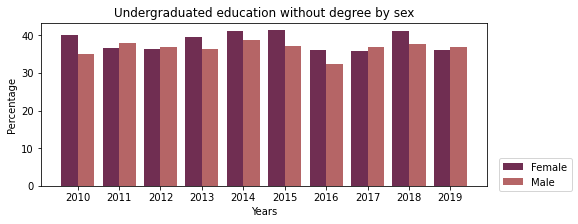

In [16]:
plt.figure(figsize=(8,3))

X_axis = np.arange(len(df['year']))
plt.bar(X_axis - 0.2, df['female_no_higher_degree'], 0.4, label = 'Female',  color = '#702E52')
plt.bar(X_axis + 0.2, df['male_no_higher_degree'], 0.4, label = 'Male',  color = '#B56566')
  
plt.xticks(X_axis, df['year'])
plt.xlabel("Years")
plt.ylabel("Percentage")
plt.title("Undergraduated education without degree by sex")
plt.legend( loc='upper right', bbox_to_anchor = (1.2, 0.2))
plt.savefig('no_degree.jpg')
plt.show()

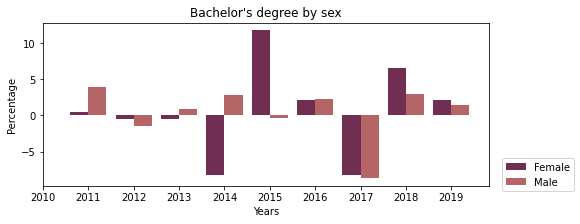

In [17]:
plt.figure(figsize=(8,3))

X_axis = np.arange(len(df['year']))
plt.bar(X_axis - 0.2, df['pct_change_male_bachelor'], 0.4, label = 'Female',  color = '#702E52')
plt.bar(X_axis + 0.2, df['pct_change_female_bachelor'], 0.4, label = 'Male',  color = '#B56566')
  
plt.xticks(X_axis, df['year'])
plt.xlabel("Years")
plt.ylabel("Percentage")
plt.title("Bachelor's degree by sex")
plt.legend( loc='upper right', bbox_to_anchor = (1.2, 0.2))
plt.savefig('bachelor.jpg', bbox_inches = 'tight')
plt.show()

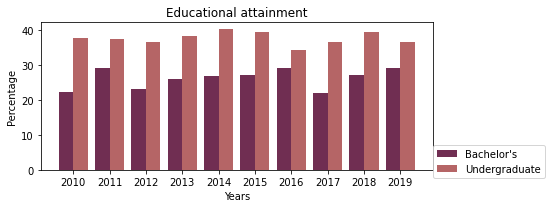

In [18]:
plt.figure(figsize=(8,3))

X_axis = np.arange(len(df['year']))
plt.bar(X_axis - 0.2, df['total_bachelor_higher'], 0.4, label = "Bachelor's",  color = '#702E52')
plt.bar(X_axis + 0.2, df['total_no_higher_degree'], 0.4, label = 'Undergraduate',  color = '#B56566')
  
plt.xticks(X_axis, df['year'])
plt.xlabel("Years")
plt.ylabel("Percentage")
plt.title("Educational attainment")
plt.legend( loc='upper right', bbox_to_anchor = (1.3, 0.2))
plt.savefig('bachelor_difference.jpg')
plt.tight_layout()
plt.show()

In [19]:
#export a subset of dataset
education_df = df[['year', 'total_estimate', 'female_no_higher_degree', 'male_no_higher_degree','percent_female_bachelor', 'percent_male_bachelor', 'total_bachelor_higher', 'total_no_higher_degree']]

education_df.to_csv('education_df.csv', index=False)

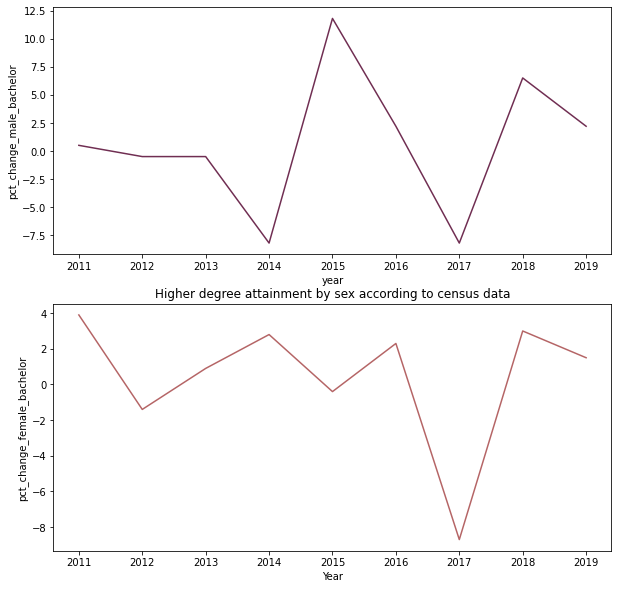

In [20]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(10,10))

sns.lineplot(x='year', y= 'pct_change_male_bachelor', data = df, color = '#702E52', ax = axs[0])
sns.lineplot(x='year', y= 'pct_change_female_bachelor', data = df, color='#B56566', ax = axs[1])
plt.title("Higher degree attainment by sex according to census data")
plt.xlabel('Year')

plt.show()

In [21]:
import plotly.graph_objects as go
fig = go.Figure(data = [
    go.Bar(name ='Some college, no degree', x = years, y = df['percent_male_some_college'], marker_color = 'blueviolet'),
    go.Bar(name = 'Associate degree', x =  years, y = df['percent_male_associate_degree'], marker_color = 'cornflowerblue')
])
fig.update_layout(title={
        'text': "Higher Education without a bachelor's degree for Male",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Years",
    autosize=False,
    width=600,
    height=300,
    barmode='group')
fig.show()

In [22]:
import plotly.graph_objects as go
fig = go.Figure(data = [
    go.Bar(name ='Some college, no degree', x = years, y = df['percent_female_some_college'], marker_color = 'blueviolet'),
    go.Bar(name = 'Associate degree', x =  years, y = df['percent_female_associate_degree'], marker_color = 'cornflowerblue')
])
fig.update_layout(title={
        'text': "Higher Education without a bachelor's degree for Female",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Years",
    autosize=False,
    width=600,
    height=300,
    barmode='group')
fig.show()

#### Hypothesis: There is a significant relatinship between education degree and experience in the current job market

In [23]:
#load data from Linkedin
linkedin_df = pd.read_csv('../Team_1/jobs_linkedin_clean.csv')
linkedin_df.head()


,Date,Company,Title,Job Description,Criteria,Seniority,Employment Type,Job Function,Industry,Experience,desc_stem,degree_value,degree_type,Job Functions type
0,2021-11-04,Dignity Health,Patient Advocate,*Overview*\n\nDignity Health Medical Foundatio...,Seniority level\nAssociate\nEmployment type\nF...,Associate,Full-time,Health Care Provider,"Nonprofit Organization Management, Health, Wel...",3.0,"{'model', 'advocaci', 'satisfact', 'relat', 'p...",1,bachelors,['Health Care Provider']
1,2021-11-04,Centene Corporation,Disease Management Enrollment Representative,Position Purpose\n\nThe Disease Management Enr...,Seniority level\nNot Applicable\nEmployment ty...,Not Applicable,Full-time,Customer Service and Information Technology,Hospital & Health Care and Insurance,3.0,"{'busi', 'relat', 'prefer', 'posit', 'protect'...",1,bachelors,['Customer Service and Information Technology']
2,2021-10-27,Dignity Health,Patient Logistics Coordinator,"*Overview*\n\nDignity Health, one of the natio...",Seniority level\nEntry level\nEmployment type\...,Entry level,Full-time,Management and Manufacturing,"Nonprofit Organization Management, Health, Wel...",2.0,"{'urgent', 'manner', 'dedic', 'critic', 'profi...",1,bachelors,['Management and Manufacturing']
3,2021-10-20,Centene Corporation,Disease Management Assistant (HNGS),Position Purpose\n\nThe Disease Management Ass...,Seniority level\nNot Applicable\nEmployment ty...,Not Applicable,Contract,Administrative,Hospital & Health Care and Insurance,3.0,"{'project', 'materi', 'satisfact', 'act', 'pre...",0,high school,['Administrative']
4,2021-10-27,Dignity Health,Patient Logistics Coordinator,"*Overview*\n\nDignity Health, one of the natio...",Seniority level\nEntry level\nEmployment type\...,Entry level,Full-time,Management and Manufacturing,"Nonprofit Organization Management, Health, Wel...",2.0,"{'urgent', 'manner', 'dedic', 'critic', 'profi...",1,bachelors,['Management and Manufacturing']


In [24]:
#Remove Seniority NA for Hypothesis testing
linkedin_df = linkedin_df[linkedin_df['Seniority']!='Not Applicable']

In [25]:
#remove jobs without any education as requirement 
linkedin_df = linkedin_df[linkedin_df['degree_type'] != 'not_specified']


<AxesSubplot:xlabel='Seniority', ylabel='degree_type'>

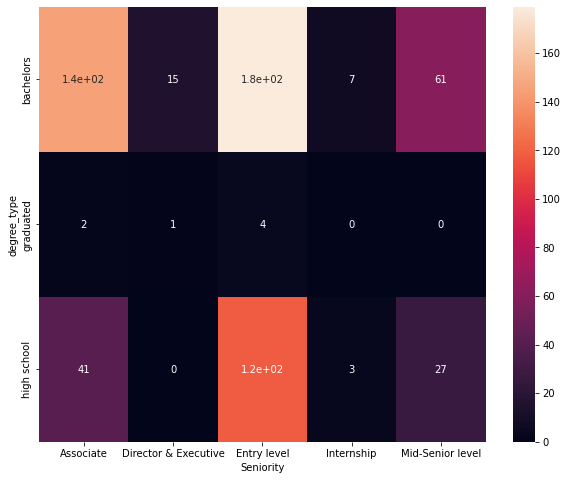

In [26]:
#contingency table for chi square
contingency_table = pd.crosstab(linkedin_df['degree_type'], linkedin_df['Seniority'])
contingency_table

plt.figure(figsize=(10,8))
sns.heatmap(contingency_table, annot=True)

In [27]:
stat, p, dof, expected = chi2_contingency(contingency_table)
critical = chi2.ppf(0.95, dof)

alpha = 0.05
p

0.0004107627173132935

Chi square test showed that we should reject the Null Hypothesis, meaning there is a significant relantioship between education and experience

## How skills are currently mismatched for employer requirements

In [28]:
#census code to soc codes

soc_codes = pd.read_excel('../DataSources/2010-occ-codes-with-crosswalk-from-2002-2011.xls', sheet_name='2010OccCodeList', header=4)
soc_codes = soc_codes.fillna("")
#clean ccupations (lower and removing punctuation)
soc_codes['Unnamed: 0'] = [re.sub(r'[^\w\s]', '', code.lower()) for code in  soc_codes['Unnamed: 0']]
soc_codes['Occupation 2010 Description'] = [re.sub(r'[^\w\s]', '', code.lower()) for code in  soc_codes['Occupation 2010 Description']]
soc_codes.loc[570:585]

,Unnamed: 0,Occupation 2010 Description,2010 Census Code,2010 SOC Code
570,,semiconductor processors,8840,51-9141
571,,adhesive bonding machine operators and tenders,8850,51-9191
572,,cleaning washing and metal pickling equipment ...,8860,51-9192
573,,cooling and freezing equipment operators and t...,8900,51-9193
574,,etchers and engravers,8910,51-9194
575,,molders shapers and casters except metal and p...,8920,51-9195
576,,paper goods machine setters operators and tenders,8930,51-9196
577,,tire builders,8940,51-9197
578,,helpersproduction workers,8950,51-9198
579,,production workers all other,8965,51-9199


In [30]:
#set a label of True if include several broad groups
soc_codes['label'] = soc_codes['2010 SOC Code'].str.contains("[0-9]{2}-[0-9]{4} -", regex=True )
df_soc = soc_codes[(soc_codes['label'] == False)]
df_soc = df_soc[df_soc['2010 Census Code'] != '']
df_soc.tail(20)

,Unnamed: 0,Occupation 2010 Description,2010 Census Code,2010 SOC Code,label
610,,conveyor operators and tenders,9500,53-7011,False
611,,crane and tower operators,9510,53-7021,False
612,,dredge excavating and loading machine operators,9520,53-7030,False
613,,hoist and winch operators,9560,53-7041,False
614,,industrial truck and tractor operators,9600,53-7051,False
615,,cleaners of vehicles and equipment,9610,53-7061,False
616,,laborers and freight stock and material movers...,9620,53-7062,False
617,,machine feeders and offbearers,9630,53-7063,False
618,,packers and packagers hand,9640,53-7064,False
619,,pumping station operators,9650,53-7070,False


In [31]:
#remove info about general groups, SOC Code ##-####-##-#### and leave only ##-####
soc_codes['label'] = soc_codes['2010 SOC Code'].str.contains("[0-9]{2}-[0-9]{4} -", regex=True )
soc_codes[(soc_codes['label'] == True)]

,Unnamed: 0,Occupation 2010 Description,2010 Census Code,2010 SOC Code,label
3,management business science and arts occupations,,0010-3540,11-0000 - 29-0000,True
5,,management business and financial occupations,0010-0950,11-0000 - 13-0000,True
71,,computer engineering and science occupations,1000-1965,15-0000 - 19-0000,True
142,,education legal community service arts and med...,2000-2960,21-0000 - 27-0000,True
235,service occupations,,3600-4650,31-0000 - 39-0000,True
320,sales and office occupations,,4700-5940,41-0000 - 43-0000,True
398,natural resources construction and maintenance...,,6005-7630,45-0000 - 49-0000,True
495,production transportation and material moving ...,,7700-9750,51-0000 - 53-0000,True
583,,transportation occupations,9000-9420,53-1000 - 53-6000,True


In [34]:
occupation_19 = pd.read_csv('../DataSources/occupations_by_sex.csv')
occupation_19.tail(10)

,Label (Grouping),"Rancho Cordova city, California!!Total!!Estimate","Rancho Cordova city, California!!Total!!Margin of Error","Rancho Cordova city, California!!Male!!Estimate","Rancho Cordova city, California!!Male!!Margin of Error","Rancho Cordova city, California!!Percent Male!!Estimate","Rancho Cordova city, California!!Percent Male!!Margin of Error","Rancho Cordova city, California!!Female!!Estimate","Rancho Cordova city, California!!Female!!Margin of Error","Rancho Cordova city, California!!Percent Female!!Estimate","Rancho Cordova city, California!!Percent Female!!Margin of Error"
26,Sales and related occupations,2188,±785,1184,±517,54.1%,±13.0,1004,±444,45.9%,±13.0
27,Office and administrative support occu...,3468,±819,1175,±492,33.9%,±11.0,2293,±633,66.1%,±11.0
28,"Natural resources, construction, and maint...",2520,±732,2520,±732,100.0%,±7.4,0,±216,0.0%,±7.4
29,"Farming, fishing, and forestry occupat...",0,±216,0,±216,-,**,0,±216,-,**
30,Construction and extraction occupations,1466,±565,1466,±565,100.0%,±12.3,0,±216,0.0%,±12.3
31,"Installation, maintenance, and repair ...",1054,±537,1054,±537,100.0%,±16.6,0,±216,0.0%,±16.6
32,"Production, transportation, and material m...",3381,±784,2929,±754,86.6%,±10.8,452,±385,13.4%,±10.8
33,Production occupations,1490,±519,1183,±482,79.4%,±20.1,307,±329,20.6%,±20.1
34,Transportation occupations,1295,±654,1295,±654,100.0%,±13.8,0,±216,0.0%,±13.8
35,Material moving occupations,596,±316,451,±268,75.7%,±27.4,145,±188,24.3%,±27.4


In [35]:
#clean occupation and filter columns to Total Estimate for Male, Female and total
occupation_19['occupations_nor'] = [occupation.replace(u'\xa0', u'').lower() for occupation in occupation_19['Label (Grouping)']]
occupation_19['occupations_nor'] = [re.sub(r'[^\w\s]', '', occupation) for occupation in  occupation_19['occupations_nor']]
occupation_19 = occupation_19[['occupations_nor', 'Rancho Cordova city, California!!Total!!Estimate', 'Rancho Cordova city, California!!Male!!Estimate', 'Rancho Cordova city, California!!Female!!Estimate']]
occupation_19 = occupation_19.rename(columns={'Rancho Cordova city, California!!Total!!Estimate': 'Total',
                                                'Rancho Cordova city, California!!Male!!Estimate':'Male', 
                                                'Rancho Cordova city, California!!Female!!Estimate': 'Female'})
occupation_19.head(10)

,occupations_nor,Total,Male,Female
0,fulltime yearround civilian employed populatio...,24705,14342,10363
1,management business science and arts occupations,9550,4511,5039
2,management business and financial occupations,3268,1434,1834
3,management occupations,2036,1107,929
4,business and financial operations occupations,1232,327,905
5,computer engineering and science occupations,2876,2081,795
6,computer and mathematical occupations,1649,1136,513
7,architecture and engineering occupations,649,512,137
8,life physical and social science occupations,578,433,145
9,education legal community service arts and med...,1507,547,960


In [36]:
#filter occupations differente than empty
soc_df = soc_codes[(soc_codes['Unnamed: 0'] != '')]
soc_df


,Unnamed: 0,Occupation 2010 Description,2010 Census Code,2010 SOC Code,label
3,management business science and arts occupations,,0010-3540,11-0000 - 29-0000,True
235,service occupations,,3600-4650,31-0000 - 39-0000,True
320,sales and office occupations,,4700-5940,41-0000 - 43-0000,True
398,natural resources construction and maintenance...,,6005-7630,45-0000 - 49-0000,True
495,production transportation and material moving ...,,7700-9750,51-0000 - 53-0000,True
625,military specific occupations,,9800-9830,55-0000,False


In [39]:
#add SOC code for each occupation
occupation_19_code = occupation_19.merge(df_soc, how='left', right_on='Occupation 2010 Description', left_on='occupations_nor')
occupation_19_code = occupation_19_code[['occupations_nor', 'Total', 'Male', 'Female', '2010 SOC Code']]


In [40]:
#input an occupation that didn't match due to its assigned code is 53-1000 - 53-6000
occupation_19_code.loc[occupation_19_code['occupations_nor'] == 'transportation occupations', '2010 SOC Code'] = '53-0000'
occupation_19_code.dropna(inplace=True)
occupation_19_code['Major_group'] = [re.search(r"^[0-9]{2}", str(code))[0] for code in occupation_19_code['2010 SOC Code']]
occupation_19_code

,occupations_nor,Total,Male,Female,2010 SOC Code,Major_group
3,management occupations,2036,1107,929,11-0000,11
4,business and financial operations occupations,1232,327,905,13-0000,13
6,computer and mathematical occupations,1649,1136,513,15-0000,15
7,architecture and engineering occupations,649,512,137,17-0000,17
8,life physical and social science occupations,578,433,145,19-0000,19
10,community and social service occupations,616,148,468,21-0000,21
11,legal occupations,351,180,171,23-0000,23
13,arts design entertainment sports and media occ...,299,172,127,27-0000,27
14,healthcare practitioners and technical occupat...,1899,449,1450,29-0000,29
18,healthcare support occupations,627,154,473,31-0000,31


In [42]:
#load data from O*NET with skills by occupation updated on 08/2021
skills_df = pd.read_excel('../DataSources/Skills.xlsx', sheet_name='Skills')
skills_df = skills_df[skills_df['Scale Name'] == 'Importance']
skills_df = skills_df[skills_df['Date'] == '08/2021']
skills_df = skills_df[['O*NET-SOC Code', 'Title', 'Element ID', 'Data Value']]
skills_df.head()

,O*NET-SOC Code,Title,Element ID,Data Value
70,11-1011.03,Chief Sustainability Officers,2.A.1.a,4.00
72,11-1011.03,Chief Sustainability Officers,2.A.1.b,4.00
74,11-1011.03,Chief Sustainability Officers,2.A.1.c,4.12
76,11-1011.03,Chief Sustainability Officers,2.A.1.d,4.00
78,11-1011.03,Chief Sustainability Officers,2.A.1.e,2.88


In [43]:
#extract patterns of SOC codes to match with broad group with census occupation
skills_df['Major_group'] = [re.search(r"^[0-9]{2}", str(code))[0] for code in skills_df['O*NET-SOC Code']]
skills_df['SOC_group'] = [re.search(r"[0-9]{4}", str(code))[0] for code in skills_df['O*NET-SOC Code']]
skills_df['Minor_group'] = [code[0] for code in skills_df['SOC_group']]
skills_df['broad_occupation'] = [code[1:3] for code in skills_df['SOC_group']]
skills_df['detailed_occupation'] = [ code[3:] for code in skills_df['SOC_group']] 
skills_df

,O*NET-SOC Code,Title,Element ID,Data Value,Major_group,SOC_group,Minor_group,broad_occupation,detailed_occupation
70,11-1011.03,Chief Sustainability Officers,2.A.1.a,4.00,11,1011,1,01,1
72,11-1011.03,Chief Sustainability Officers,2.A.1.b,4.00,11,1011,1,01,1
74,11-1011.03,Chief Sustainability Officers,2.A.1.c,4.12,11,1011,1,01,1
76,11-1011.03,Chief Sustainability Officers,2.A.1.d,4.00,11,1011,1,01,1
78,11-1011.03,Chief Sustainability Officers,2.A.1.e,2.88,11,1011,1,01,1
...,...,...,...,...,...,...,...,...,...
60890,53-7072.00,"Pump Operators, Except Wellhead Pumpers",2.B.4.h,2.12,53,7072,7,07,2
60892,53-7072.00,"Pump Operators, Except Wellhead Pumpers",2.B.5.a,3.00,53,7072,7,07,2
60894,53-7072.00,"Pump Operators, Except Wellhead Pumpers",2.B.5.b,2.00,53,7072,7,07,2
60896,53-7072.00,"Pump Operators, Except Wellhead Pumpers",2.B.5.c,2.25,53,7072,7,07,2


In [44]:
#filter skills by broad group based on reference of content model reference (O*NET)
skills_df['Element_ID_group'] = [re.sub(r".[a-z]", '', element) for element in skills_df['Element ID']]
skills_df.head()

,O*NET-SOC Code,Title,Element ID,Data Value,Major_group,SOC_group,Minor_group,broad_occupation,detailed_occupation,Element_ID_group
70,11-1011.03,Chief Sustainability Officers,2.A.1.a,4.00,11,1011,1,01,1,2.A.1
72,11-1011.03,Chief Sustainability Officers,2.A.1.b,4.00,11,1011,1,01,1,2.A.1
74,11-1011.03,Chief Sustainability Officers,2.A.1.c,4.12,11,1011,1,01,1,2.A.1
76,11-1011.03,Chief Sustainability Officers,2.A.1.d,4.00,11,1011,1,01,1,2.A.1
78,11-1011.03,Chief Sustainability Officers,2.A.1.e,2.88,11,1011,1,01,1,2.A.1


In [45]:
#filter by technical skills
new_df = skills_df.merge(occupation_19_code, how='inner', on="Major_group")
new_df = new_df[new_df['Element_ID_group'] == '2.B.3']
new_df = new_df.drop_duplicates(['Major_group', 'Element_ID_group'])
new_df

,O*NET-SOC Code,Title,Element ID,Data Value,Major_group,SOC_group,Minor_group,broad_occupation,detailed_occupation,Element_ID_group,occupations_nor,Total,Male,Female,2010 SOC Code
17,11-1011.03,Chief Sustainability Officers,2.B.3.a,2.88,11,1011,1,01,1,2.B.3,management occupations,2036,1107,929,11-0000
227,13-1041.01,Environmental Compliance Inspectors,2.B.3.a,2.50,13,1041,1,04,1,2.B.3,business and financial operations occupations,1232,327,905,13-0000
332,15-1299.03,Document Management Specialists,2.B.3.a,2.25,15,1299,1,29,9,2.B.3,computer and mathematical occupations,1649,1136,513,15-0000
437,17-1011.00,"Architects, Except Landscape and Naval",2.B.3.a,4.00,17,1011,1,01,1,2.B.3,architecture and engineering occupations,649,512,137,17-0000
612,19-1013.00,Soil and Plant Scientists,2.B.3.a,3.00,19,1013,1,01,3,2.B.3,life physical and social science occupations,578,433,145,19-0000
927,21-1011.00,Substance Abuse and Behavioral Disorder Counse...,2.B.3.a,2.00,21,1011,1,01,1,2.B.3,community and social service occupations,616,148,468,21-0000
1067,23-1012.00,Judicial Law Clerks,2.B.3.a,1.25,23,1012,1,01,2,2.B.3,legal occupations,351,180,171,23-0000
1102,27-1027.00,Set and Exhibit Designers,2.B.3.a,3.75,27,1027,1,02,7,2.B.3,arts design entertainment sports and media occ...,299,172,127,27-0000
1242,29-1031.00,Dietitians and Nutritionists,2.B.3.a,3.12,29,1031,1,03,1,2.B.3,healthcare practitioners and technical occupat...,1899,449,1450,29-0000
2152,31-9011.00,Massage Therapists,2.B.3.a,1.62,31,9011,9,01,1,2.B.3,healthcare support occupations,627,154,473,31-0000


In [46]:
group_skills = skills_df[['Element_ID_group', 'Major_group']].groupby(['Major_group'])
group_skills.count()

#get total groups from SOC Major group
group_dict = dict()
for key in group_skills.groups.keys():
    group_dict[key] = group_skills.get_group(key).count()[0]

group_dict

{'11': 210,
 '13': 105,
 '15': 105,
 '17': 175,
 '19': 315,
 '21': 140,
 '23': 35,
 '25': 35,
 '27': 140,
 '29': 910,
 '31': 140,
 '35': 105,
 '37': 35,
 '39': 70,
 '41': 35,
 '43': 175,
 '47': 35,
 '49': 280,
 '51': 175,
 '53': 280}

In [48]:
group_count = skills_df[['Major_group', 'Element_ID_group','SOC_group' ]].groupby(['Major_group', 'Element_ID_group'])
group_count.count()

SOC_group
Major_group Element_ID_group           
11          2.A.1                    36
            2.A.2                    24
            2.B.1                    36
            2.B.2                     6
            2.B.3                    66
...                                 ...
53          2.B.1                    48
            2.B.2                     8
            2.B.3                    88
            2.B.4                    24
            2.B.5                    32

[140 rows x 1 columns]

In [49]:
#create a dict to count the number of time each skills appear by each group of occupations
tuple_list = []
for key in group_skills.groups.keys():
    for activity in set(skills_df['Element_ID_group']):
       tuple_list.append((key, activity))

element_dict = dict()
for key in tuple_list:
    total = group_dict[key[0]]
    #print(group_count.get_group(key).count()[0])
    element_dict[key] = group_count.get_group(key).count()[0]

In [51]:
dict_merge = dict()
dict_to_df = []
for el, val in element_dict.items():
    dict_merge = {'group': el[0], 
                'skill_id':el[1], 
                'count' : val ,
                'total' : group_dict[el[0]]}
    dict_to_df.append(dict_merge)
    

In [66]:
#remove duplicates based on broad group and broad skill group
skills_df = skills_df.drop_duplicates(['Element_ID_group', 'O*NET-SOC Code'])
skills_df[skills_df['Title'] == 'Chief Executives']
skills_df

,O*NET-SOC Code,Title,Element ID,Data Value,Major_group,SOC_group,Minor_group,broad_occupation,detailed_occupation,Element_ID_group
70,11-1011.03,Chief Sustainability Officers,2.A.1.a,4.00,11,1011,1,01,1,2.A.1
82,11-1011.03,Chief Sustainability Officers,2.A.2.a,4.12,11,1011,1,01,1,2.A.2
90,11-1011.03,Chief Sustainability Officers,2.B.1.a,3.88,11,1011,1,01,1,2.B.1
102,11-1011.03,Chief Sustainability Officers,2.B.2.i,4.00,11,1011,1,01,1,2.B.2
104,11-1011.03,Chief Sustainability Officers,2.B.3.a,2.88,11,1011,1,01,1,2.B.3
...,...,...,...,...,...,...,...,...,...,...
60850,53-7072.00,"Pump Operators, Except Wellhead Pumpers",2.B.1.a,2.75,53,7072,7,07,2,2.B.1
60862,53-7072.00,"Pump Operators, Except Wellhead Pumpers",2.B.2.i,2.88,53,7072,7,07,2,2.B.2
60864,53-7072.00,"Pump Operators, Except Wellhead Pumpers",2.B.3.a,1.88,53,7072,7,07,2,2.B.3
60886,53-7072.00,"Pump Operators, Except Wellhead Pumpers",2.B.4.e,3.00,53,7072,7,07,2,2.B.4


In [67]:
#create a technical skills ratio by the count of number of skills that appears in each group of occupations
conversion_df = pd.DataFrame(dict_to_df)


tech_occupation = conversion_df[conversion_df['skill_id'] =='2.B.3' ]
tech_occupation['technical_skill_ratio'] = tech_occupation['count']/tech_occupation['total']
tech_occupation.head(20)

,group,skill_id,count,total,technical_skill_ratio
5,11,2.B.3,66,210,0.314286
12,13,2.B.3,33,105,0.314286
19,15,2.B.3,33,105,0.314286
26,17,2.B.3,55,175,0.314286
33,19,2.B.3,99,315,0.314286
40,21,2.B.3,44,140,0.314286
47,23,2.B.3,11,35,0.314286
54,25,2.B.3,11,35,0.314286
61,27,2.B.3,44,140,0.314286
68,29,2.B.3,286,910,0.314286


In [56]:
#merge census data for occupation by sex with skills group
occupation_19_skills = occupation_19_code.merge(skills_df, how='inner', on="Major_group")
occupation_19_skills[occupation_19_skills['occupations_nor'] == 'management occupations']
occupation_19_skills = occupation_19_skills.drop_duplicates(['Major_group', 'Element_ID_group'])
occupation_19_skills.to_csv('/home/aliciescont/Documents/Github/WiD_residency/WiD_Residency_2021_October/DataSources/CensusData/educational_attainment/skill_occupation.csv')

In [57]:
occupation_19_skills[['occupations_nor', 'Total', 'Male', 'Female', 'Element_ID_group', 'Data Value']]

,occupations_nor,Total,Male,Female,Element_ID_group,Data Value
0,management occupations,2036,1107,929,2.A.1,4.00
1,management occupations,2036,1107,929,2.A.2,4.12
2,management occupations,2036,1107,929,2.B.1,3.88
3,management occupations,2036,1107,929,2.B.2,4.00
4,management occupations,2036,1107,929,2.B.3,2.88
...,...,...,...,...,...,...
639,transportation occupations,1295,1295,0,2.B.1,3.25
640,transportation occupations,1295,1295,0,2.B.2,3.62
641,transportation occupations,1295,1295,0,2.B.3,2.12
642,transportation occupations,1295,1295,0,2.B.4,4.00


In [58]:
plot_df = occupation_19_skills[['occupations_nor', 'Total', 'Data Value']][occupation_19_skills['Element_ID_group'] == '2.B.3']
plot_df = plot_df.rename(columns={'occupations_nor': 'occupations', 'Data Value': 'Technical skills importance'})

In [59]:
plot_df['occupations'] = plot_df['occupations'].map(lambda x : x.replace('occupations', ''))
plot_df['occupations']


4                                         management 
46                 business and financial operations 
67                         computer and mathematical 
88                      architecture and engineering 
123                 life physical and social science 
186                     community and social service 
214                                            legal 
221       arts design entertainment sports and media 
249           healthcare practitioners and technical 
431                               healthcare support 
459             food preparation and serving related 
480    building and grounds cleaning and maintenance 
487                        personal care and service 
501                                sales and related 
508                office and administrative support 
543                      construction and extraction 
550              installation maintenance and repair 
606                                       production 
641                         

In [60]:
plot_df.to_csv('skills_df.csv', index=False)

In [61]:
plot_df = plot_df.sort_values(by=['Technical skills importance'], ascending=False)

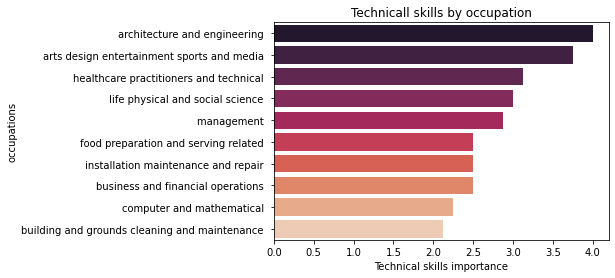

In [63]:

sns.barplot(data = plot_df[:10], x='Technical skills importance', y="occupations", palette='rocket')
plt.title('Technicall skills by occupation')
plt.savefig('skills.jpg',  bbox_inches = 'tight')

In [64]:


fig = px.bar(plot_df, x='Technical skills importance', y="occupations")
fig.update_layout(title='Technical skills importance (O*NET) for occupations', title_x=0.5)
fig.show()



In [77]:
#dicts to extract info about data from group of occupations "computer, engineering and science occupations" from census data
occupation_dict ={'total_estimate' : 'S2401_C01_006E', 'male_estimate':'S2401_C02_006E', 'female_estimate' : 'S2401_C04_006E' }

occupation_dict_11 ={'total_estimate' : 'S2401_C01_006E', 'male_estimate':'S2401_C02_006E', 'female_estimate' : 'S2401_C03_006E' }

In [72]:
#create dataframe of occupations census data
years = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
occupation_census = []
occu_path = f'/home/aliciescont/Documents/Github/WiD_residency/WiD_Residency_2021_October/DataSources/CensusData/occupation_2011_2019/'


for year in years:
    if year in ['2011', '2012', '2013', '2014']:
        data = get_data(occupation_dict_11, load_census(year, occu_path), year) 
        data['female_estimate'] = int(float(data['female_estimate'])/100*int(data['total_estimate']))
        data['male_estimate'] = int(float(data['male_estimate'])/100*int(data['total_estimate']))
    
        occupation_census.append(data)
    else:
        occupation_census.append(get_data(occupation_dict, load_census(year, occu_path), year))

df_census_occupation = pd.DataFrame(occupation_census)

In [74]:
#change type to float
df_census_occupation['female_estimate'] = df_census_occupation['female_estimate'].astype('float')
df_census_occupation['male_estimate'] = df_census_occupation['male_estimate'].astype('float')
df_census_occupation.dtypes

year                object
total_estimate      object
male_estimate      float64
female_estimate    float64
dtype: object

In [75]:
#extract data
df_census_occupation.to_csv('computer.csv', index=False)

In [78]:
df_census_occupation.head()

,year,total_estimate,male_estimate,female_estimate
0,2011,2233,1306.0,926.0
1,2012,2553,1838.0,714.0
2,2013,2114,1528.0,585.0
3,2014,2515,1939.0,575.0
4,2015,2452,1891.0,561.0


In [79]:
#test to check if there is a significant relationship between men and women occupied in "computer, engineering and science occupations" in Rancho Cordova
stats.ttest_ind(df_census_occupation['male_estimate'], df_census_occupation['female_estimate'])


Ttest_indResult(statistic=7.1136088151251196, pvalue=2.4569220467767934e-06)

Since p value <0.05, we whould reject the null hypothesis

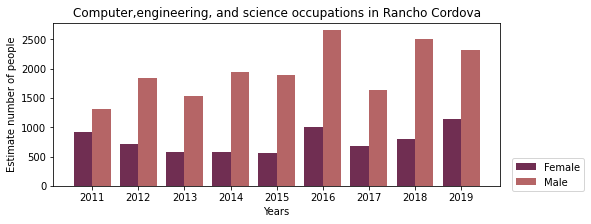

In [80]:
#plot people occupied in "computer, engineering and science occupations" 2011-2019
plt.figure(figsize=(8,3))

X_axis = np.arange(len(df_census_occupation['year']))
plt.bar(X_axis - 0.2, df_census_occupation['female_estimate'], 0.4, label = 'Female',  color = '#702E52')
plt.bar(X_axis + 0.2, df_census_occupation['male_estimate'], 0.4, label = 'Male',  color = '#B56566')
  
plt.xticks(X_axis, df_census_occupation['year'])
plt.xlabel("Years")
plt.ylabel("Estimate number of people")
plt.title("Computer,engineering, and science occupations in Rancho Cordova")
plt.legend( loc='upper right', bbox_to_anchor = (1.2, 0.2))
plt.savefig('bachelor.jpg', bbox_inches = 'tight')
plt.show()